In [1]:
# %matplotlib widget

import os
import numpy as np
import pandas as pd
import itertools as it
from glob import glob
import matplotlib.pyplot as plt
from sbpy.calib import Sun
from astropy import units as u
from astropy.io import fits

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch

from lvmdrp.core.constants import LVM_UNAM_URL
from lvmdrp.utils.examples import fetch_example_data, get_frames_metadata, get_masters_metadata

from lvmdrp.core import rss, image, spectrum1d
from lvmdrp.functions import imageMethod, rssMethod, fluxCalMethod

plt.style.use("seaborn-v0_8-talk")

In [2]:
# define input data directory
data_path = os.path.abspath(os.path.join("..", "data"))

# let's create the output directory
output_path = "./data"
os.makedirs(output_path, exist_ok=True)

# create processed frames path template
out_main_path = os.path.join(output_path, "lvm-{kind}-{camera}-{expnum}.fits")
out_calib_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{exptime}.fits")
out_arc_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{lamps}.fits")

# overwrite or not
OVERWRITE = False

In [3]:
# extract metadata
frames_table = get_frames_metadata(path=os.path.join(data_path, "lco_com"), ignore_cache=False).to_pandas()
frames_table = frames_table.loc[~frames_table.mjd.isin([60008,60009,60037,60038])]

[INFO]: loading cached metadata from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/frames_table.pkl'


     mjd  kind camera       lamps                                      path
7  super  xarc     b1  neon_xenon  ./data/lvm-super-xarc-b1-neon_xenon.fits
8  super  xarc     b2  neon_xenon  ./data/lvm-super-xarc-b2-neon_xenon.fits
5  super  xarc     b3  neon_xenon  ./data/lvm-super-xarc-b3-neon_xenon.fits
0  super  xarc     r1  neon_xenon  ./data/lvm-super-xarc-r1-neon_xenon.fits
3  super  xarc     r2  neon_xenon  ./data/lvm-super-xarc-r2-neon_xenon.fits
2  super  xarc     r3  neon_xenon  ./data/lvm-super-xarc-r3-neon_xenon.fits
4  super  xarc     z1  neon_xenon  ./data/lvm-super-xarc-z1-neon_xenon.fits
1  super  xarc     z2  neon_xenon  ./data/lvm-super-xarc-z2-neon_xenon.fits
6  super  xarc     z3  neon_xenon  ./data/lvm-super-xarc-z3-neon_xenon.fits
mjd                                          super
kind                                          xarc
camera                                          b1
lamps                                   neon_xenon
path      ./data/lvm-super-xarc-b1-n

measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [03:29<00:00,  1.52fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [04:56<00:00,  1.07fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[WARNING]: fiber 42 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 8.89253 AA (15.1198 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.289168 AA (0.490051 pix)
[WARNING]: overflow encountered in power (RuntimeWarning)


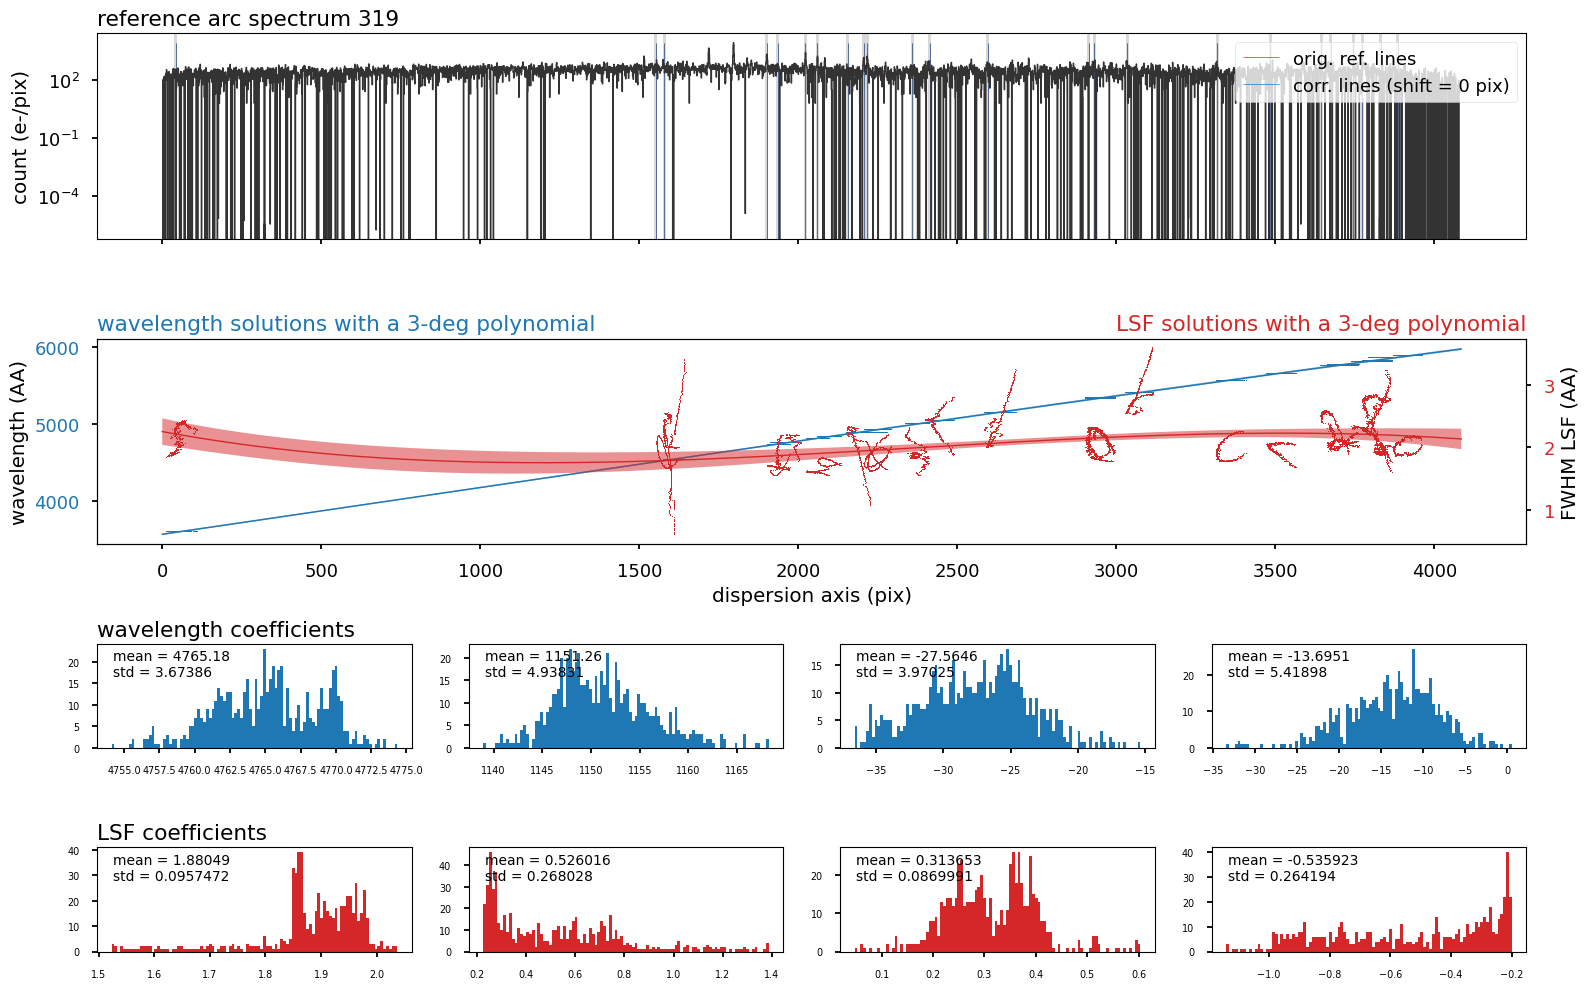

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b1-neon_xenon.fits' and './data/lvm-super-lsf-b1-neon_xenon.fits'
mjd                                          super
kind                                          xarc
camera                                          b2
lamps                                   neon_xenon
path      ./data/lvm-super-xarc-b2-neon_xenon.fits
Name: 8, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_xenon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 25 percentage masked  4 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b2-neon_xenon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 36 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [02:59<00:00,  1.78fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [02:31<00:00,  2.11fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 10.2714 AA (17.3105 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.149161 AA (0.252419 pix)


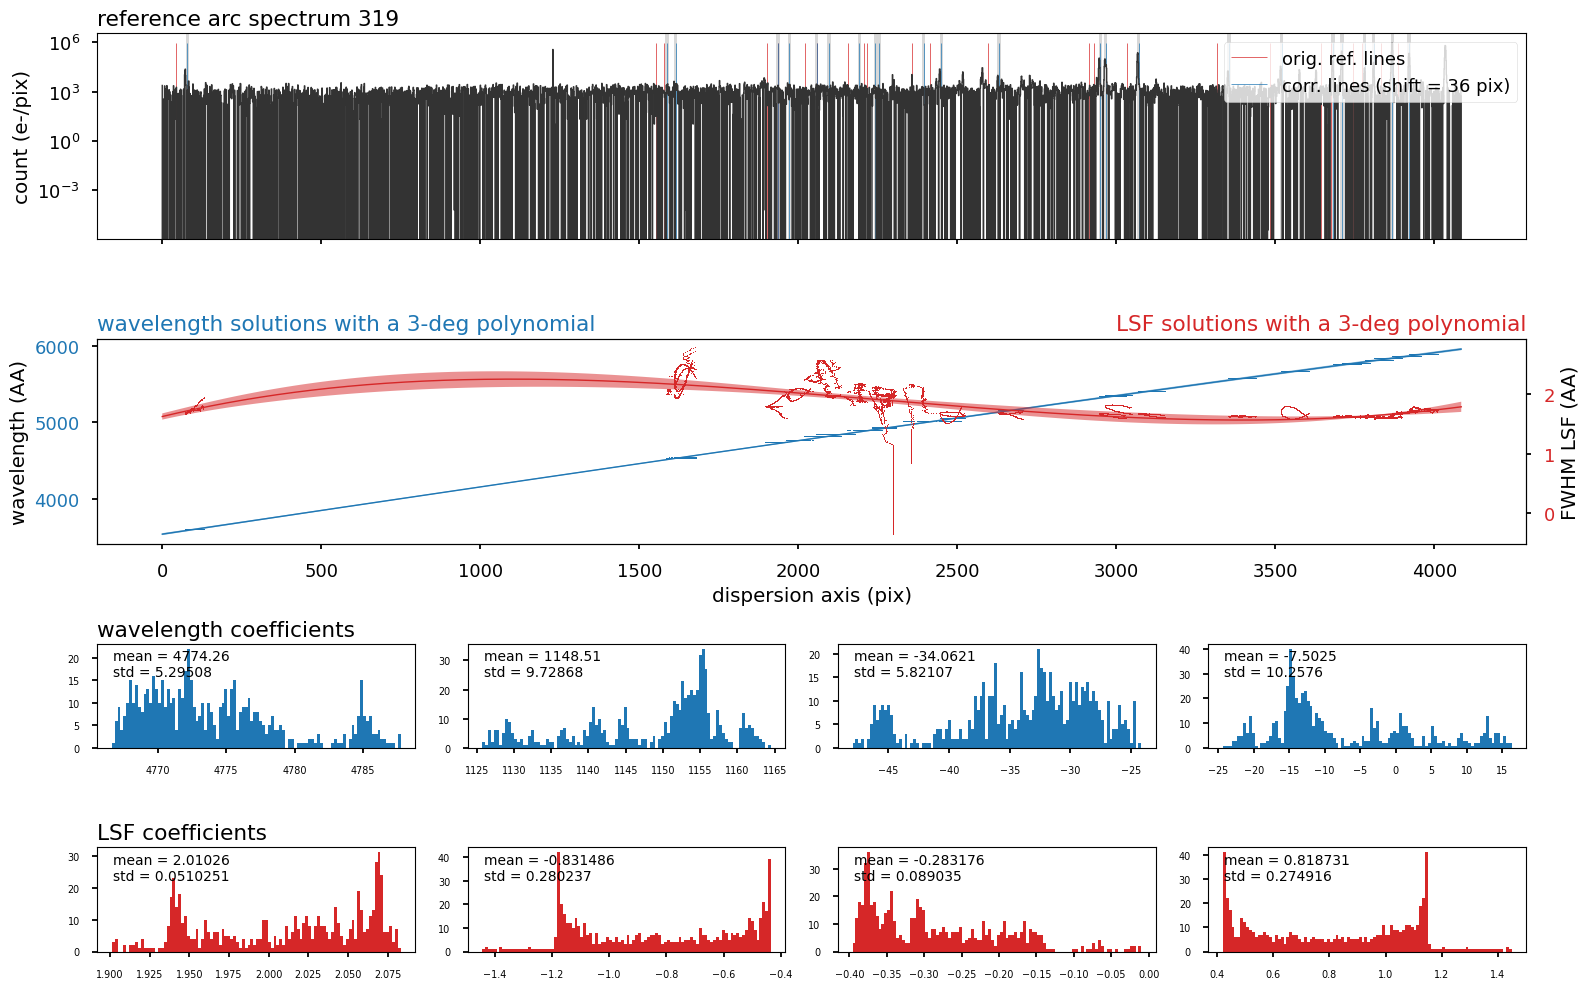

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b2-neon_xenon.fits' and './data/lvm-super-lsf-b2-neon_xenon.fits'
mjd                                          super
kind                                          xarc
camera                                          b3
lamps                                   neon_xenon
path      ./data/lvm-super-xarc-b3-neon_xenon.fits
Name: 5, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_xenon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 25 percentage masked  4 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b3-neon_xenon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 34 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [02:45<00:00,  1.92fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [03:08<00:00,  1.69fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 12.9585 AA (21.7224 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.162022 AA (0.274223 pix)


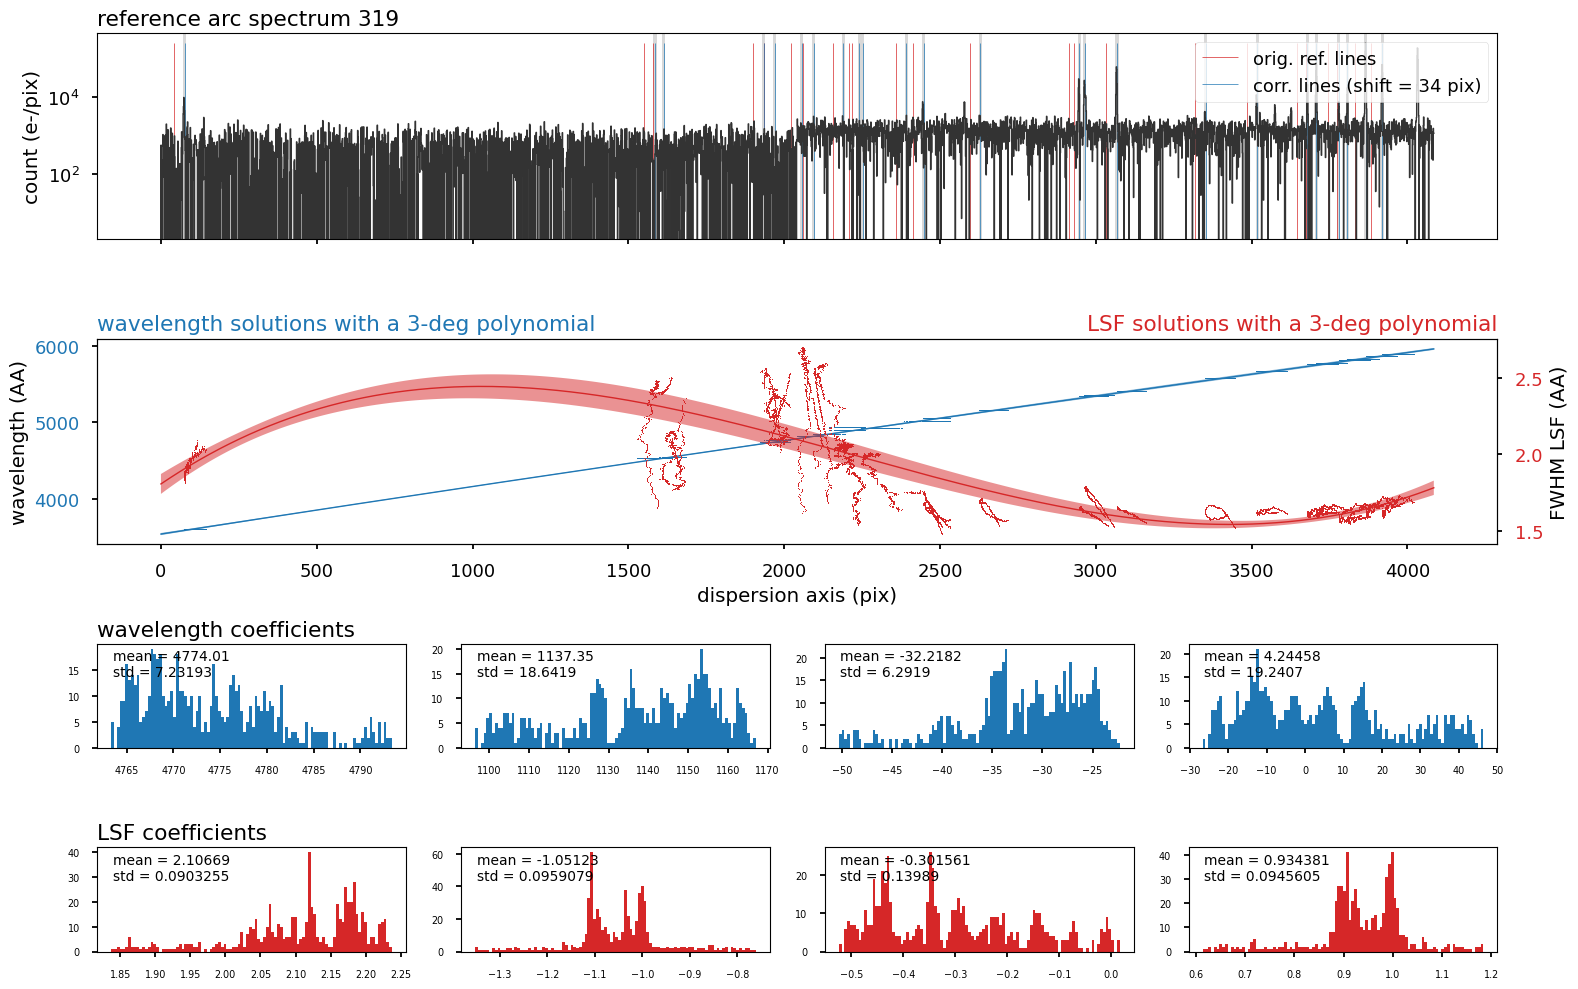

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b3-neon_xenon.fits' and './data/lvm-super-lsf-b3-neon_xenon.fits'
mjd                                          super
kind                                          xarc
camera                                          r1
lamps                                   neon_xenon
path      ./data/lvm-super-xarc-r1-neon_xenon.fits
Name: 0, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_xenon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 46 percentage masked  39.1304 %
[INFO]: going to use 28 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r1-neon_xenon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 1 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [02:46<00:00,  1.92fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [01:33<00:00,  3.41fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[WARNING]: fiber 0 has all lines masked
[WARNING]: fiber 12 has all lines masked
[WARNING]: fiber 13 has all lines masked
[WARNING]: fiber 15 has all lines masked
[WARNING]: fiber 16 has all lines masked
[WARNING]: fiber 17 has all lines masked
[WARNING]: fiber 19 has all lines masked
[WARNING]: fiber 634 has all lines masked
[WARNING]: fiber 636 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 27.3999 AA (52.881 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.652258 AA (1.24314 pix)


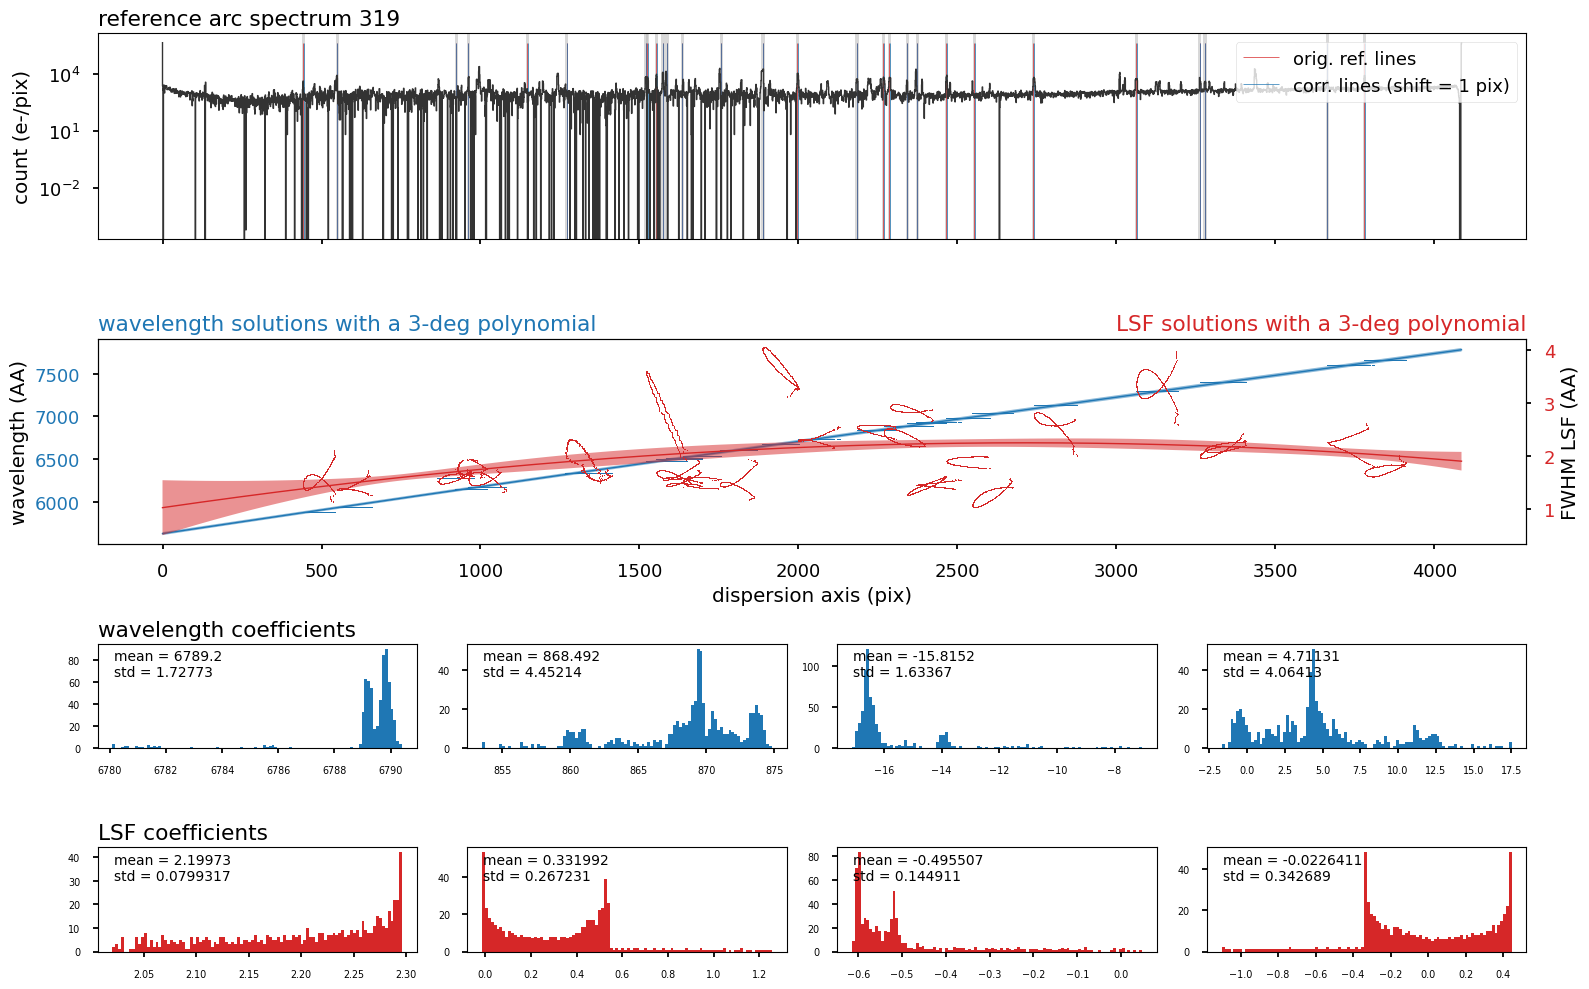

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r1-neon_xenon.fits' and './data/lvm-super-lsf-r1-neon_xenon.fits'
mjd                                          super
kind                                          xarc
camera                                          r2
lamps                                   neon_xenon
path      ./data/lvm-super-xarc-r2-neon_xenon.fits
Name: 3, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_xenon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 46 percentage masked  39.1304 %
[INFO]: going to use 28 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r2-neon_xenon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 8 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [03:59<00:00,  1.33fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [03:49<00:00,  1.38fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 39.5023 AA (73.1575 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.989439 AA (1.73332 pix)


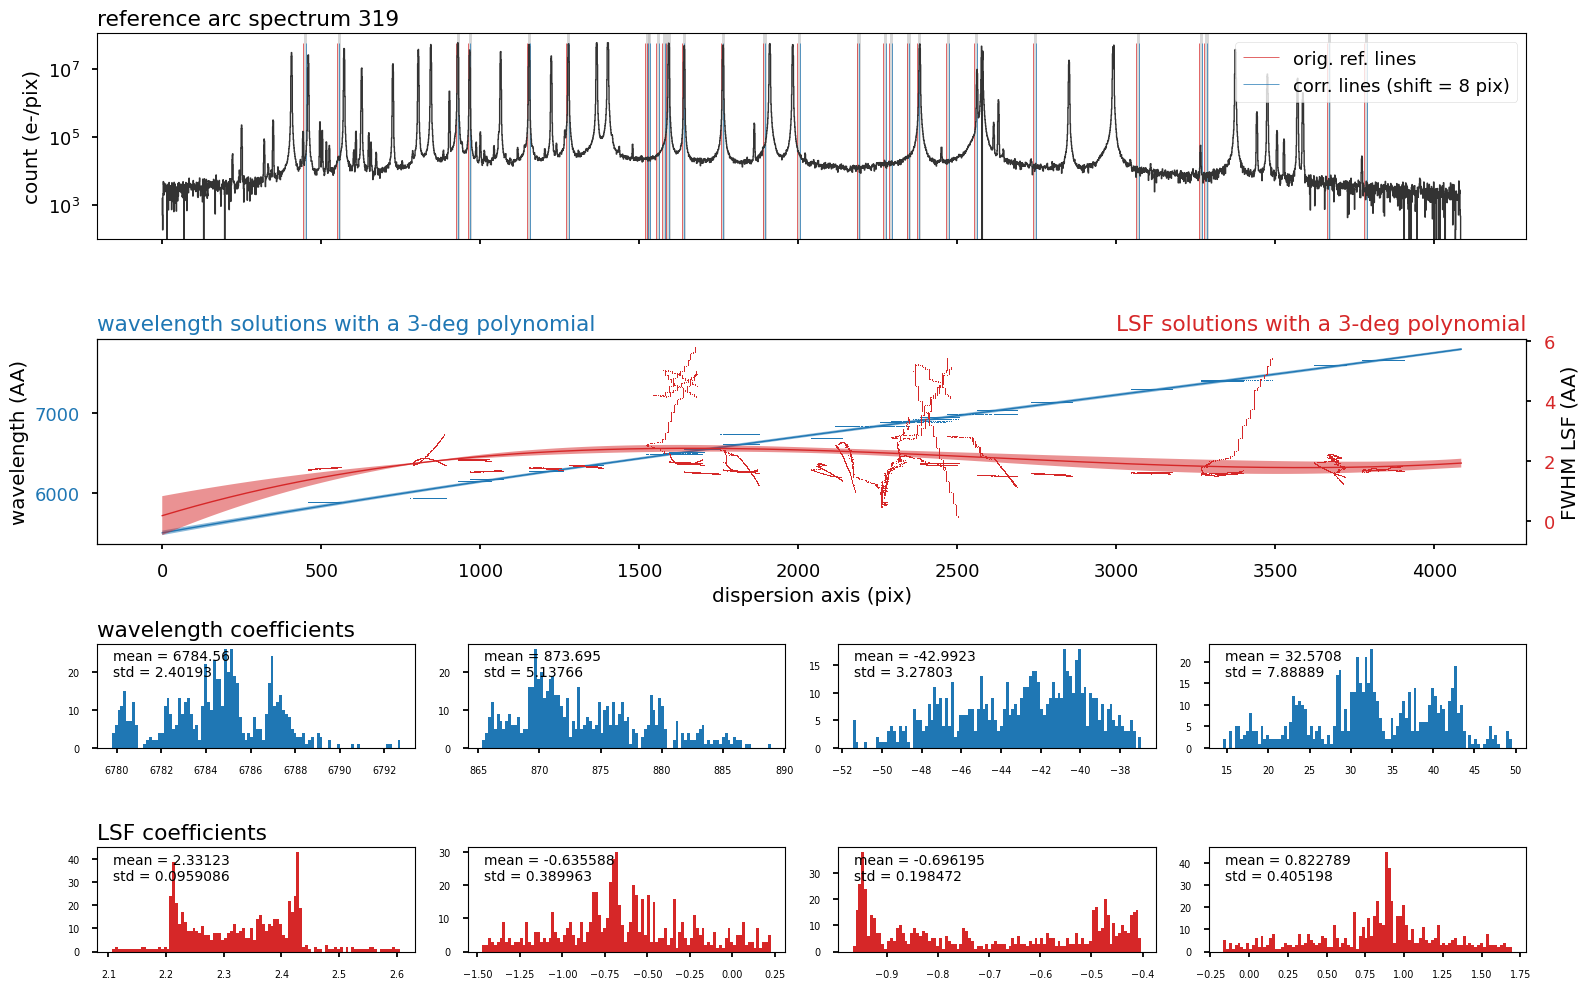

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r2-neon_xenon.fits' and './data/lvm-super-lsf-r2-neon_xenon.fits'
mjd                                          super
kind                                          xarc
camera                                          r3
lamps                                   neon_xenon
path      ./data/lvm-super-xarc-r3-neon_xenon.fits
Name: 2, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_xenon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 46 percentage masked  39.1304 %
[INFO]: going to use 28 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r3-neon_xenon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -5 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [01:26<00:00,  3.70fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [01:34<00:00,  3.37fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 42.9957 AA (80.3362 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.519543 AA (0.934736 pix)


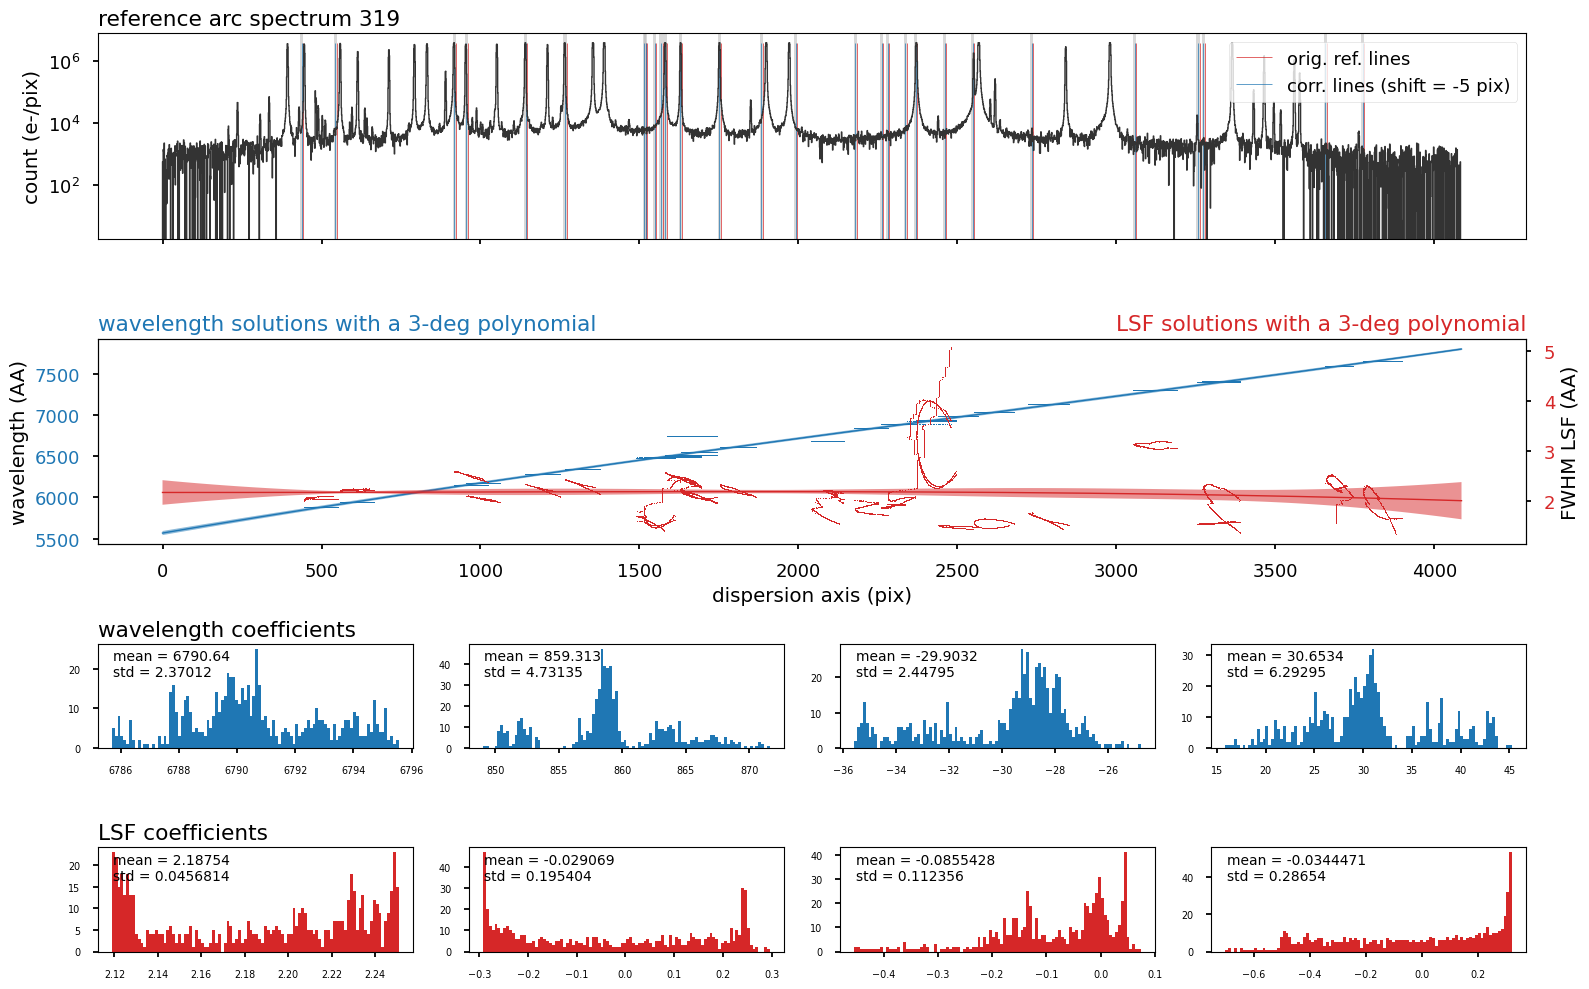

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r3-neon_xenon.fits' and './data/lvm-super-lsf-r3-neon_xenon.fits'
mjd                                          super
kind                                          xarc
camera                                          z1
lamps                                   neon_xenon
path      ./data/lvm-super-xarc-z1-neon_xenon.fits
Name: 4, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_xenon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 44 percentage masked  11.3636 %
[INFO]: going to use 39 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z1-neon_xenon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 1 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [02:45<00:00,  1.93fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [02:49<00:00,  1.88fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 26.1892 AA (44.5102 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 1.11251 AA (1.85183 pix)


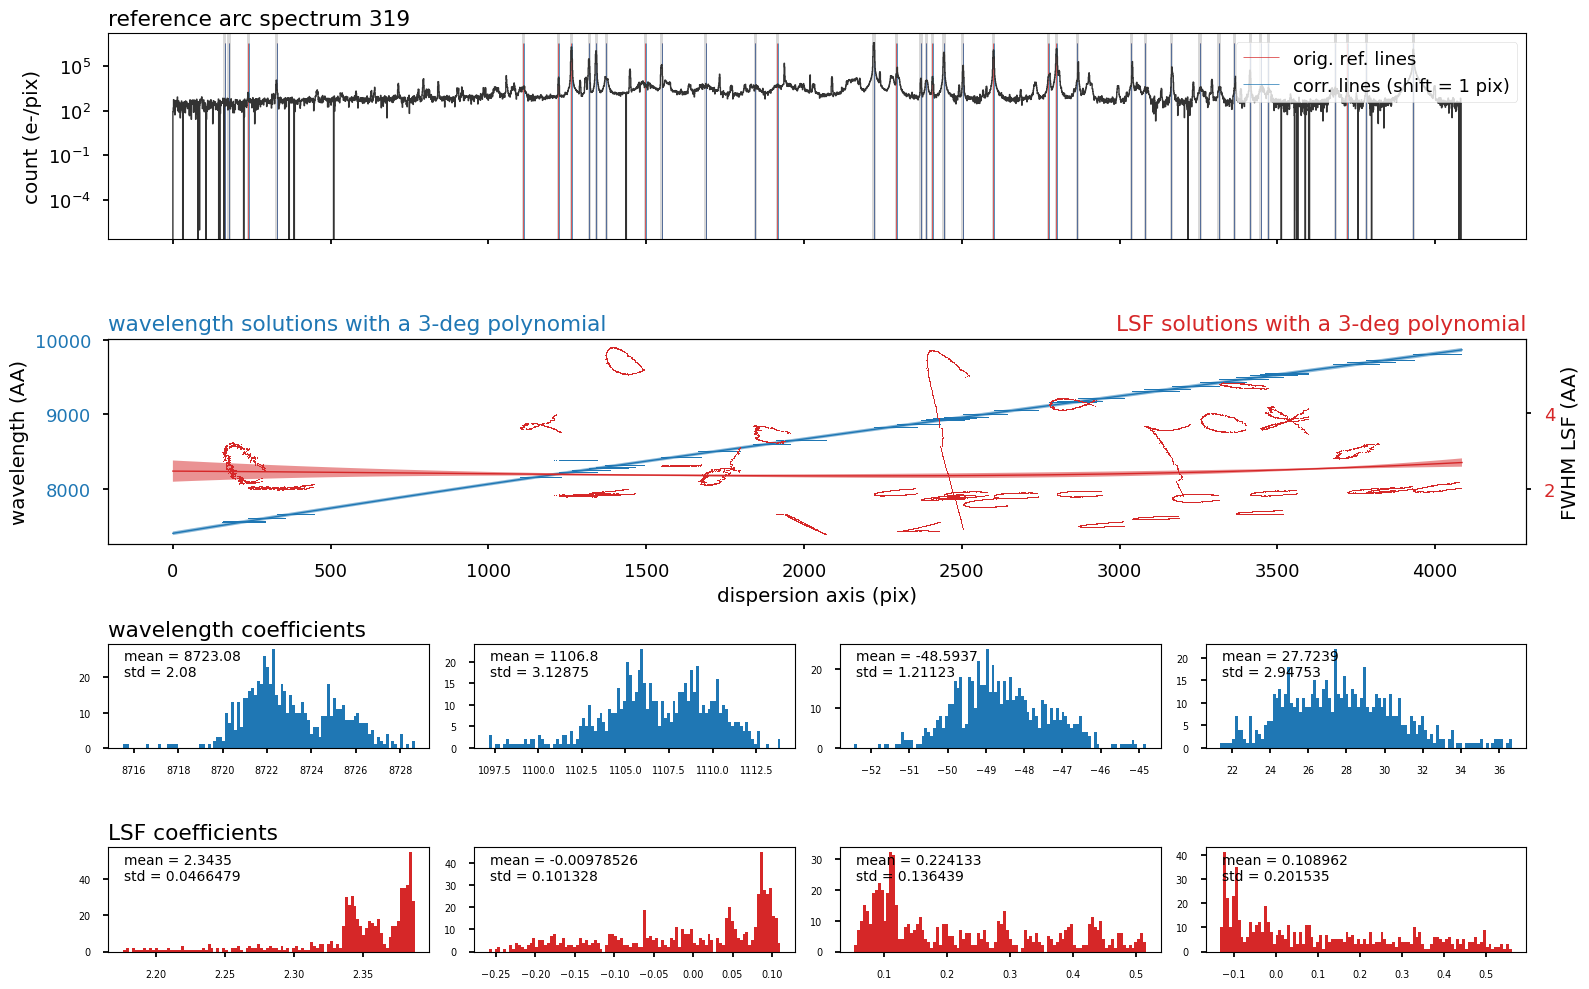

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z1-neon_xenon.fits' and './data/lvm-super-lsf-z1-neon_xenon.fits'
mjd                                          super
kind                                          xarc
camera                                          z2
lamps                                   neon_xenon
path      ./data/lvm-super-xarc-z2-neon_xenon.fits
Name: 1, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_xenon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 44 percentage masked  11.3636 %
[INFO]: going to use 39 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z2-neon_xenon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 10 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [01:47<00:00,  2.95fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [01:45<00:00,  3.02fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 38.8127 AA (63.7391 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.302165 AA (0.501878 pix)


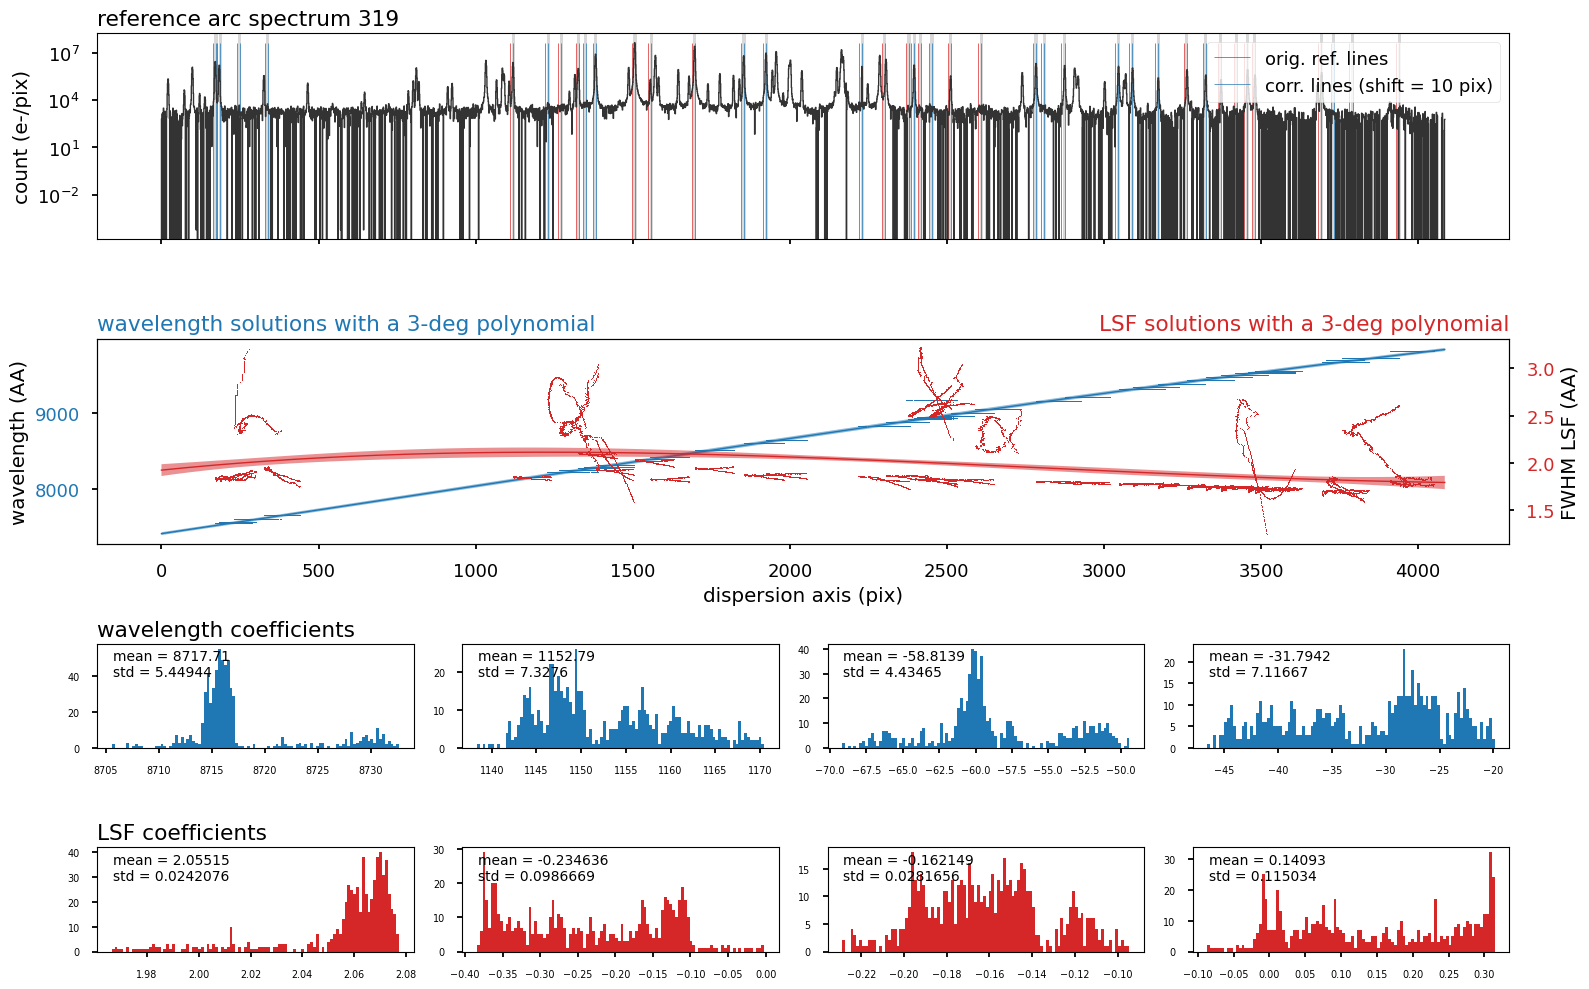

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z2-neon_xenon.fits' and './data/lvm-super-lsf-z2-neon_xenon.fits'
mjd                                          super
kind                                          xarc
camera                                          z3
lamps                                   neon_xenon
path      ./data/lvm-super-xarc-z3-neon_xenon.fits
Name: 6, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_xenon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 44 percentage masked  11.3636 %
[INFO]: going to use 39 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z3-neon_xenon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -14 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [02:38<00:00,  2.01fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [02:05<00:00,  2.54fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[WARNING]: fiber 0 has all lines masked
[WARNING]: fiber 108 has all lines masked
[WARNING]: fiber 355 has all lines masked
[WARNING]: fiber 427 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 12.0983 AA (19.5874 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.258596 AA (0.426085 pix)


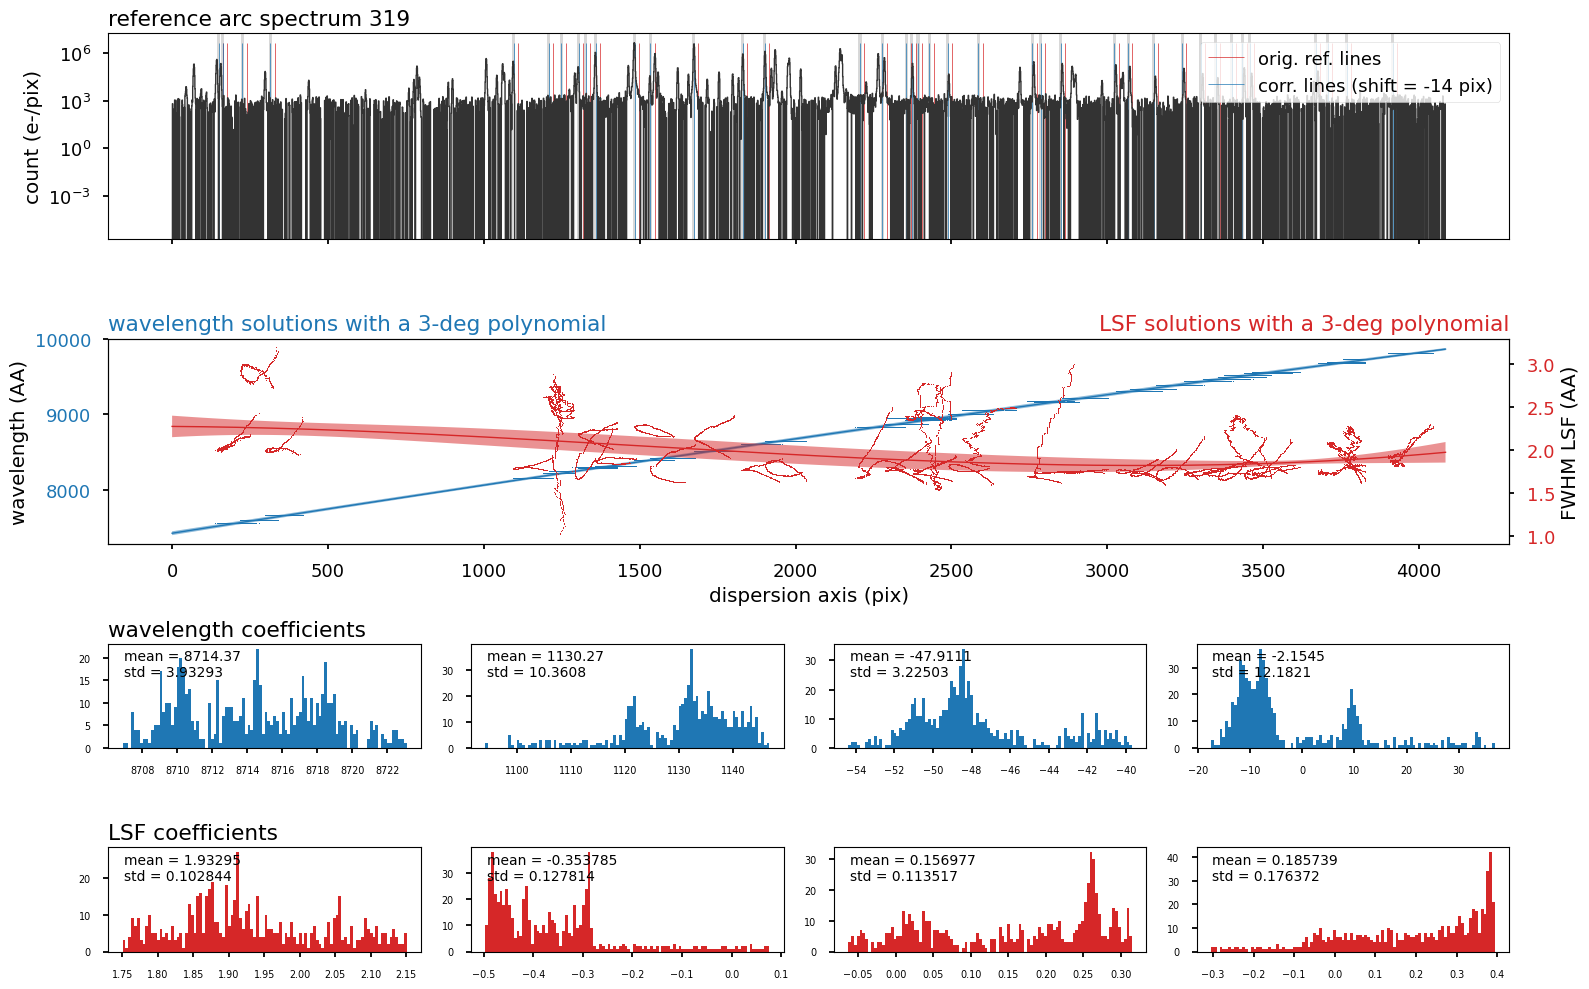

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z3-neon_xenon.fits' and './data/lvm-super-lsf-z3-neon_xenon.fits'


In [5]:
CHANNEL_WL = {"b": (3600, 5930), "r": (5660, 7720), "z": (7470, 9800)}
LAMPS = "neon_xenon"
REF_FIBER = 319

masters_arc = get_masters_metadata(path_pattern=out_arc_path, mjd="super", kind="xarc", lamps=LAMPS).sort_values("camera")
print(masters_arc.to_string())

for _, marc in masters_arc.iterrows():
    print(marc)

    try:
        rssMethod.detWaveSolution_drp(
            in_arc=marc.path,
            out_wave=out_arc_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, lamps=marc.lamps),
            out_lsf=out_arc_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, lamps=marc.lamps),
            in_ref_lines=f"../../python/lvmdrp/etc/lvm-{LAMPS}_nist_{marc.camera[0]}1.txt",
            ref_fiber=REF_FIBER, poly_disp=3, poly_fwhm=3, poly_cros=3, poly_kinds="poly,poly,poly",
            flux_min="1", fwhm_max="10", rel_flux_limits="0.001,100", aperture=12, plot=1
        )
        rssMethod.createPixTable_drp(
            in_rss=out_arc_path.format(mjd=marc.mjd, kind="xarc", camera=marc.camera, lamps=marc.lamps),
            out_rss=out_arc_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, lamps=marc.lamps),
            arc_wave=out_arc_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, lamps=marc.lamps),
            arc_fwhm=out_arc_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, lamps=marc.lamps)
        )
        wave_range = CHANNEL_WL[marc.camera[0]]
        rssMethod.resampleWave_drp(
            in_rss=out_arc_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, lamps=marc.lamps),
            out_rss=out_arc_path.format(mjd=marc.mjd, kind="harc", camera=marc.camera, lamps=marc.lamps),
            start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
            err_sim=10, parallel="auto", extrapolate=True
        )
    except Exception as e:
        rssMethod.rss_logger.error(e)